


<font color= blue />

# Data Science Nigeria 2019 Challenge -  Insurance Prediction


<font color= brown />


### By Gikunju Kibugu

### <font color = blue /> OBJECTIVE OF THIS MODEL:

A predictive model to determine if a building will have an insurance claim during a certain period or not. You will have to predict the probability of having at least one claim over the insured period of the building.

### Column Name	Definition:
##### Variable	Description
- Customer Id:- 	Identification number for the Policy holder
- Year Of Observation:-	 year of observation for the insured policy
- Insured_Period:-	 duration of insurance policy in Olusola Insurance. (Ex: Full year insurance, Policy Duration = 1; 6 months= 0.5
- Residential:-	 is the building a residential building or not
- Building_Painted:-  is the building painted or not (N-Painted, V-Not Painted)
- Building_Fenced:- 	is the building fence or not (N-Fenced, V-Not Fenced)
- Garden:-  building has garden or not (V-has garden; O-no garden)
- Settlement:-	 Area where the building is located. (R- rural area; U- urban area)
- Building Dimension:-	 Size of the insured building in m2
- Building_Type:-	 The type of building (Type 1, 2, 3, 4)
- Date_of_Occupancy:- 	date building was first occupied
- Number Of Windows:-	 number of windows in the building
- Geo Code:-	 Geographical Code of the Insured building
- Claim:- target variable. (0: no claim, 1: at least one claim over insured period).



### <font color = blue />  1. EXPLORATORY DATA ANALYSIS:

The objective of exploratory data analysis is to try and achieve the following way in understanding the data and try to get insight from it. EDA refers to the critical process in investigation on data so as to help us get the summary statistics and graphical representations.




#### 1.1 INGEST THE DATA.

In [1]:
# import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import warnings                                 # Suppress warnings 
warnings.filterwarnings('ignore')
import os                                       # File system manangement
import gc                                       # memory management
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# load a dataset.
df_train = pd.read_csv("train_data.csv")
df_test = pd.read_csv("test_data.csv")
df_submission=pd.read_csv("sample_submission.csv")

In [3]:
# view the first 5 rows and last row of the data
# Print First Few Rows Of The Data
display("train")
display(df_train.head(3))
display("test")
display(df_test.head(3))

'train'

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0


'test'

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310


In [4]:
# Data Dimension
# The no of columns and rows in the data
print('Training data: {} Rows, {} Columns'.format(*df_train.shape))
print('Testing  data: {} Rows, {} Columns'.format(*df_test.shape))

Training data: 7160 Rows, 14 Columns
Testing  data: 3069 Rows, 13 Columns


In [5]:
# The columns and their names.
df_train.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [6]:
# Different columns and their data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
Customer Id           7160 non-null object
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building_Painted      7160 non-null object
Building_Fenced       7160 non-null object
Garden                7153 non-null object
Settlement            7160 non-null object
Building Dimension    7054 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     6652 non-null float64
NumberOfWindows       7160 non-null object
Geo_Code              7058 non-null object
Claim                 7160 non-null int64
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [7]:
# This gives the descriptive statistics for the data 
df_train.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [8]:
df_train.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

- On the missing Values on the total female and male we will use average
- The most impressive and travel with we will use 'none'


1. Year Of Observation
2. Date_of_Occupancy, 


##### 1.1 The distribution based the age group:

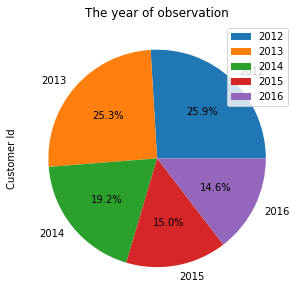

In [9]:

df_train.groupby('YearOfObservation')['Customer Id'].count().plot.pie(figsize=(5,5),
                                               title = "The year of observation",
                                               legend = True,
                                               autopct='%.1f%%');

In [10]:
# combine the test data and train data.
df=pd.concat([df_train,df_test],sort=False).reset_index(drop=True)

In [11]:
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0.0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0.0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0.0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0.0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0.0


In [12]:
df.isnull().sum()

Customer Id              0
YearOfObservation        0
Insured_Period           0
Residential              0
Building_Painted         0
Building_Fenced          0
Garden                  11
Settlement               0
Building Dimension     119
Building_Type            0
Date_of_Occupancy     1236
NumberOfWindows          0
Geo_Code               115
Claim                 3069
dtype: int64

In [13]:
cat_features_columns = list(set(df_train.columns) - set(df_train._get_numeric_data().columns))
cat_features_columns

['Building_Fenced',
 'Building_Painted',
 'Geo_Code',
 'Customer Id',
 'Settlement',
 'Garden',
 'NumberOfWindows']

In [14]:
# ignore missing values in the garden.
df['Garden']=df['Garden'].fillna(method='ffill')
df['Building Dimension']=df['Building Dimension'].fillna(method='ffill')
df['Date_of_Occupancy']=df['Date_of_Occupancy'].fillna(method='ffill')
df['Geo_Code']=df['Geo_Code'].fillna(method='ffill')

In [15]:
# see the no of year of occupancy.
df['ageofbuilding']=df['YearOfObservation']-df['Date_of_Occupancy']

In [16]:
# converting the categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Residential'] = le.fit_transform(df['Residential'])
df['Building_Painted'] = le.fit_transform(df['Building_Painted'])
#df['NumberOfWindows'] = le.fit_transform(df['NumberOfWindows'])
df['Building_Fenced'] = le.fit_transform(df['Building_Fenced'])
df['Garden'] = le.fit_transform(df['Garden'])
df['Geo_Code'] = le.fit_transform(df['Geo_Code'])


In [17]:
columns_to_transform = ['YearOfObservation','Settlement','NumberOfWindows']
df = pd.get_dummies( df,columns = columns_to_transform,drop_first=True)

In [18]:
df.head()

,Customer Id,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Building Dimension,Building_Type,Date_of_Occupancy,Geo_Code,...,NumberOfWindows_1,NumberOfWindows_2,NumberOfWindows_3,NumberOfWindows_4,NumberOfWindows_5,NumberOfWindows_6,NumberOfWindows_7,NumberOfWindows_8,NumberOfWindows_9,NumberOfWindows_>=10
0,H14663,1.0,0,0,1,1,290.0,1,1960.0,7,...,0,0,0,0,0,0,0,0,0,0
1,H2037,1.0,0,1,0,0,490.0,1,1850.0,7,...,0,0,0,1,0,0,0,0,0,0
2,H3802,1.0,0,0,1,1,595.0,1,1960.0,7,...,0,0,0,0,0,0,0,0,0,0
3,H3834,1.0,0,1,1,1,2840.0,1,1960.0,7,...,0,0,0,0,0,0,0,0,0,0
4,H5053,1.0,0,1,0,0,680.0,1,1800.0,7,...,0,0,1,0,0,0,0,0,0,0


####  1.2.1 Indentify the no of categorical features in our dataset.: 
In our client data we can  let's find out the number of Categorical Features in our dataset.

In [19]:
cat_features_columns = list(set(df_train.columns) - set(df_train._get_numeric_data().columns))
cat_features_columns

['Building_Fenced',
 'Building_Painted',
 'Geo_Code',
 'Customer Id',
 'Settlement',
 'Garden',
 'NumberOfWindows']

#### 1.2.2 seaborn: -  Check the correlation and distributions

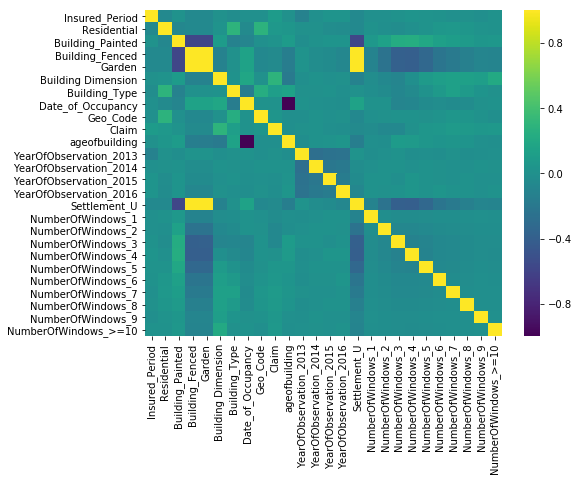

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='viridis');

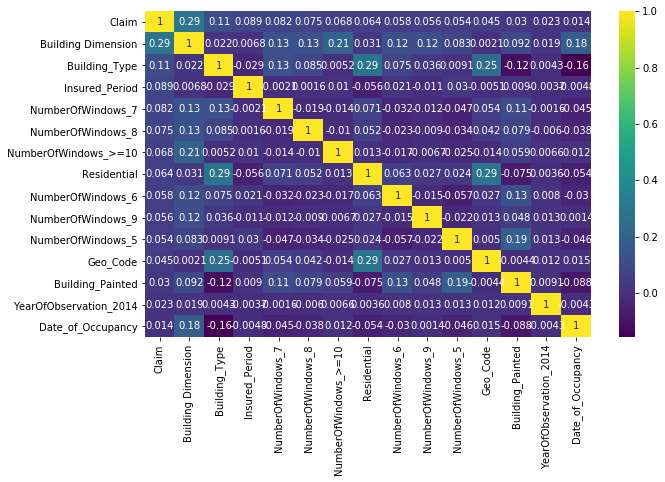

In [21]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Claim')['Claim'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis');

In [22]:
#df=df.drop(['Garden'],axis = 1)

### <font color = blue /> 2. Feature Engineering:

In [23]:
df.isnull().sum()

Customer Id                  0
Insured_Period               0
Residential                  0
Building_Painted             0
Building_Fenced              0
Garden                       0
Building Dimension           0
Building_Type                0
Date_of_Occupancy            0
Geo_Code                     0
Claim                     3069
ageofbuilding                0
YearOfObservation_2013       0
YearOfObservation_2014       0
YearOfObservation_2015       0
YearOfObservation_2016       0
Settlement_U                 0
NumberOfWindows_1            0
NumberOfWindows_2            0
NumberOfWindows_3            0
NumberOfWindows_4            0
NumberOfWindows_5            0
NumberOfWindows_6            0
NumberOfWindows_7            0
NumberOfWindows_8            0
NumberOfWindows_9            0
NumberOfWindows_>=10         0
dtype: int64

In [24]:
## convert float dtypes to int
#df['YearOfObservation'] = df['YearOfObservation'].astype('int')
df['Insured_Period'] = df['Insured_Period'].astype('int')
df['Building Dimension'] = df['Building Dimension'].astype('int')
df['Date_of_Occupancy'] = df['Date_of_Occupancy'].astype('int')
df['ageofbuilding']=df['ageofbuilding'].astype('int')

In [25]:
cat_features_columns = list(set(df_train.columns) - set(df_train._get_numeric_data().columns))
cat_features_columns

['Building_Fenced',
 'Building_Painted',
 'Geo_Code',
 'Customer Id',
 'Settlement',
 'Garden',
 'NumberOfWindows']

In [26]:
## separate data into train and test
df_train=df[df.Claim.notnull()].reset_index(drop=True)
df_test=df[df.Claim.isna()].reset_index(drop=True)

In [27]:
df_train.shape


(7160, 27)

In [28]:
df_train.columns

Index(['Customer Id', 'Insured_Period', 'Residential', 'Building_Painted',
       'Building_Fenced', 'Garden', 'Building Dimension', 'Building_Type',
       'Date_of_Occupancy', 'Geo_Code', 'Claim', 'ageofbuilding',
       'YearOfObservation_2013', 'YearOfObservation_2014',
       'YearOfObservation_2015', 'YearOfObservation_2016', 'Settlement_U',
       'NumberOfWindows_1', 'NumberOfWindows_2', 'NumberOfWindows_3',
       'NumberOfWindows_4', 'NumberOfWindows_5', 'NumberOfWindows_6',
       'NumberOfWindows_7', 'NumberOfWindows_8', 'NumberOfWindows_9',
       'NumberOfWindows_>=10'],
      dtype='object')

In [29]:
df_test.shape

(3069, 27)

In [30]:
df_test.columns

Index(['Customer Id', 'Insured_Period', 'Residential', 'Building_Painted',
       'Building_Fenced', 'Garden', 'Building Dimension', 'Building_Type',
       'Date_of_Occupancy', 'Geo_Code', 'Claim', 'ageofbuilding',
       'YearOfObservation_2013', 'YearOfObservation_2014',
       'YearOfObservation_2015', 'YearOfObservation_2016', 'Settlement_U',
       'NumberOfWindows_1', 'NumberOfWindows_2', 'NumberOfWindows_3',
       'NumberOfWindows_4', 'NumberOfWindows_5', 'NumberOfWindows_6',
       'NumberOfWindows_7', 'NumberOfWindows_8', 'NumberOfWindows_9',
       'NumberOfWindows_>=10'],
      dtype='object')

In [31]:
#df_train=df_train.dropna()

### <font color = blue /> 3. Model Evaluation.

In [32]:
# loading the library that will help us to model
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
X = df_train.drop(["Customer Id","Claim"],1).select_dtypes(exclude=['object'])
cols = X.columns
y=df_train["Claim"]


In [33]:

X = df_train.drop(columns = ['Claim']).select_dtypes(exclude=['object'])
y = df_train['Claim']


X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.001, random_state = 42)
df_model = XGBRegressor(n_estimators=1000, learning_rate=0.01)
df_model.fit(X_train, y_train, 
             early_stopping_rounds=20, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)
cost_predict = df_model.predict(X_valid)
mean_absolute_error(cost_predict, y_valid)

0.19726571813225746

In [34]:
sub = df_test[cols]
predictions_xgb  = df_model.predict(sub)
submission_df = pd.DataFrame({'Customer Id': df_test['Customer Id'], 'Claim': predictions_xgb})
submission_df.to_csv('submit.csv',index=False)

In [35]:
# Modelling using the linear regression to improve my score
from sklearn.linear_model import LinearRegression

In [36]:
X = df_train.drop(columns=['Claim']).select_dtypes(exclude=['object'])
y = df_train['Claim']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### PREDICTED USING CATBOOST REGRESSOR

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

In [39]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_train[cols],df_train, test_size=0.25, random_state = 42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(5370, 25) (5370, 27)
(1790, 25) (1790, 27)


In [40]:
from catboost import CatBoostRegressor
predictions = []
for i in range(10):
  # Training the model
  ct=CatBoostRegressor(iterations=1000, 
                    loss_function='MAE',
                    logging_level='Silent',
                    depth = i)
ct.fit(X_train, y_train)

CatBoostError: c:/program files (x86)/go agent/pipelines/buildmaster/catboost.git/catboost/private/libs/target/data_providers.cpp:531: Currently only multi-regression objectives work with multidimensional target

In [ ]:
  # Making predictions
preds = ct.predict(X_test)
predictions.append(preds)

In [ ]:
# Averaging the preictions
preds = np.mean(predictions, axis = 0)

In [ ]:
# Model evaluation
from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(y_test, preds)
print('Error {}'.format(mae))

In [ ]:
# Doing our prediction.
sub = df_test[cols]
predictions_ct = ct.predict(sub)
submission_df = pd.DataFrame({'Customer Id': df_test['Customer Id'], 'Claim': predictions_ct})
submission_df.to_csv('ceY20.csv',index=False)